In [ ]:
import os
import numpy as np
import pretty_midi

import matplotlib.pyplot as plt 

In [ ]:
class feature(object):
    def __init__(self):
        
        

In [ ]:
    ## need to check instrument number first
    def pianoroll(self, midi_file, instrument):
        midi = pretty_midi.PrettyMIDI(midi_file)
        option = instrument ## need to fix
        m = midi.instruments[option].get_piano_roll(fs=100)
        
        return m

In [9]:
    def calculate_chroma(self, midi_file):
        # get midi information from pretty_midi
        midi = pretty_midi.PrettyMIDI(midi_file) 
        # chroma matrix - the energy in each semitone across octaves
        chroma_midi = midi.get_chroma(times=np.arange(0, midi.get_end_time(), 1/25.0))
        ## 0.04sec

        # normalize chroma_matrix columnwise by max
        chroma_midi /= (chroma_midi.max(axis=0) + (chroma_midi.max(axis=0) == 0))

        return chroma_midi

In [ ]:
    def chroma_energy(self):
        ## chroma energy distribution

        chroma_midi_norm = chroma_midi / np.sum(chroma_midi, axis=0)
        chroma_midi_norm = np.nan_to_num(chroma_midi_norm)

        CENS_midi = np.zeros(tuple(chroma_midi.shape[0:2])) 

        CENS_midi[np.where(chroma_midi_norm > 0.4)] = 4
        CENS_midi[np.where((chroma_midi_norm >= 0.2) & (chroma_midi_norm <= 0.4))] = 3
        CENS_midi[np.where((chroma_midi_norm >= 0.1) & (chroma_midi_norm < 0.2))]  = 2
        CENS_midi[np.where((chroma_midi_norm >= 0.05) & (chroma_midi_norm < 0.1))]  = 1
        CENS_midi[np.where(chroma_midi_norm < 0.05)]  = 0

        return CENS_midi

In [ ]:
    def chroma_energy_han(self):
        ## CENS_midi_hann
        
        CENS_midi_hann = np.zeros(tuple(CENS_midi.shape[0:2]))
        
        for i in range(12):
            for j in np.arange(0,CENS_midi.shape[1],41):
                CENS_midi_hann[i,j:j+41] = np.convolve(CENS_midi[i,j:j+41],np.hanning(41)[0:CENS_midi[i,j:j+41].shape[0]],'same')

        CENS_midi_hann /= np.linalg.norm(CENS_midi_hann,2,axis=0)
        CENS_midi_hann = np.nan_to_num(CENS_midi_hann)
        
        return CENS_midi_hann

In [10]:
midif = '/Users/EJ/dev/vmo/bin/files/midi/parker_omnibook/now_s_the_time.mid'
midi_ext = calculate_chroma(midif)

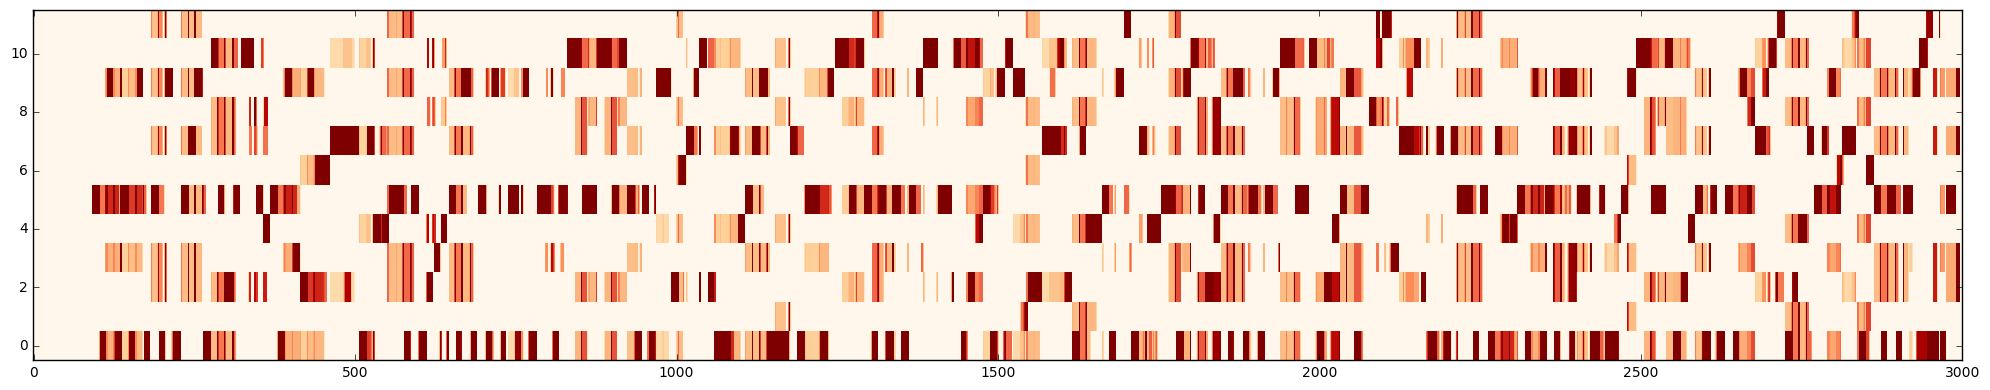

In [7]:
plt.figure(figsize=(20,4))
plt.imshow(midi_ext, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.OrRd)
plt.tight_layout()
plt.show();